2.  Find perfect model to predict brain weight from given dataset (datasets_56097_107686_headbrain). Train the model up to 15 iterations and visualize your results.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

error=[]
w00=[]
w01=[]
w02=[]
w03=[]
def run():
  d = pd.read_csv('/content/datasets_56097_107686_headbrain.csv')
  x1=np.array(d.iloc[:,0:1])
  # normalization
  for i in range(0,len(x1)):
    x1[i]=(x1[i]-x1.mean())/x1.std()
  #print(x1)
  x2=np.array(d.iloc[:,1:2])
  for i in range(0,len(x2)):
    x2[i]=(x2[i]-x2.mean())/x2.std()
  #print(x2)
  x3=np.array(d.iloc[:,2:3])
  for i in range(0,len(x3)):
    x3[i]=(x3[i]-x3.mean())/x3.std()
  #print(x3)
  y=np.array(d.iloc[:,3:4])
  learning_rate = 0.001
  initial_w0 = 1 
  initial_w1 = 1 
  initial_w2 = 1
  initial_w3 = 1
  num_iterations = 15
  compute_error(initial_w0, initial_w1,initial_w2,initial_w3,x1,x2,x3,y)
  gradient_descent_runner(x1,x2,x3,y, initial_w0, initial_w1,initial_w2,initial_w3, learning_rate, num_iterations)
    
def compute_error(w0,w1,w2,w3,x1,x2,x3,y):
    totalError = 0
    x1 = x1
    x2 = x2
    x3 = x3
    y = y
    w00.append(w0)
    w01.append(w1)
    w02.append(w2)
    w03.append(w3)
    for i in range(0,len(x1)):
      totalError+=(((w1 * x1[i])+(w2 * x2[i])+(w3 * x3[i]) + w0)-y[i])
    
    error.append(totalError/len(x1))

def step_gradient(w0_current, w1_current,w2_current,w3_current, x1,x2,x3,y, learningRate):
    w0_gradient = 0.0
    w1_gradient = 0.0
    w2_gradient = 0.0
    w3_gradient = 0.0
    N = float(len(x1))
    x1 = x1
    x2 = x2
    x3 = x3
    y = y
    w0g=[]
    w1g=[]
    w2g=[]
    w3g=[]
    for i in range(0,len(x1)):
      w0g.append(((w1_current * x1[i])+(w2_current * x2[i])+(w3_current * x3[i]) + w0_current)-y[i])
      w1g.append(x1[i] * ((((w1_current * x1[i])+(w2_current * x2[i])+(w3_current * x3[i]) + w0_current))-y[i]))
      w2g.append(x2[i] * ((((w1_current * x1[i])+(w2_current * x2[i])+(w3_current * x3[i]) + w0_current))-y[i]))
      w3g.append(x3[i] * ((((w1_current * x1[i])+(w2_current * x2[i])+(w3_current * x3[i]) + w0_current))-y[i]))
    w0_gradient=(np.array(w0g).sum())/N
    w1_gradient=(np.array(w1g).sum())/N
    w2_gradient=(np.array(w2g).sum())/N
    w3_gradient=(np.array(w3g).sum())/N
    new_w0 = w0_current - (learningRate * w0_gradient)
    new_w1 = w1_current - (learningRate * w1_gradient)
    new_w2 = w2_current - (learningRate * w2_gradient)
    new_w3 = w3_current - (learningRate * w3_gradient)
    compute_error(new_w0,new_w1,new_w2,new_w3,x1,x2,x3,y)
    return [new_w0, new_w1, new_w2, new_w3]

def gradient_descent_runner(x1, x2, x3, y, starting_w0, starting_w1, starting_w2, starting_w3, learning_rate, num_iterations):
    starting_w0 = starting_w0
    starting_w1 = starting_w1
    starting_w2 = starting_w2
    starting_w3 = starting_w3
    for i in range(num_iterations):
      starting_w0, starting_w1, starting_w2, starting_w3=step_gradient(starting_w0, starting_w1,starting_w2, starting_w3, x1,x2,x3,y, learning_rate)
   
run()


In [42]:
d = pd.read_csv('/content/datasets_56097_107686_headbrain.csv')
x1=np.array(d.iloc[:,0:1])
x2=np.array(d.iloc[:,1:2])
x3=np.array(d.iloc[:,2:3])
y =np.array(d.iloc[:,3:4])
e=np.array(error)
print(error)
e1=min(e)
print(error.index(e1))
print(error[error.index(e1)])
p=[]
for i in range(0,len(x1)):
  p.append((w01[error.index(e1)]*x1[i])+(w02[error.index(e1)]*x2[i])+(w03[error.index(e1)]*x3[i])+w00[error.index(e1)])
#plt.plot(x1,p)
print(p)

[array([-1279.67932489]), array([-1276.22567192]), array([-1272.78846396]), array([-1269.36761342]), array([-1265.96303314]), array([-1262.57463647]), array([-1259.2023372]), array([-1255.8460496]), array([-1252.50568841]), array([-1249.18116882]), array([-1245.87240649]), array([-1242.57931751]), array([-1239.30181846]), array([-1236.03982634]), array([-1232.79325863]), array([-1229.56203322])]
0
[-1279.67932489]
[array([4515]), array([3741]), array([4264]), array([3780]), array([4180]), array([3588]), array([3788]), array([3562]), array([3616]), array([3985]), array([3446]), array([3996]), array([3643]), array([4211]), array([3835]), array([3879]), array([3500]), array([3469]), array([3098]), array([4427]), array([3881]), array([4049]), array([3807]), array([3713]), array([4750]), array([4426]), array([4039]), array([4025]), array([3457]), array([4178]), array([3790]), array([3799]), array([4106]), array([4164]), array([4161]), array([3817]), array([3530]), array([3751]), array([3337

Text(0, 0.5, 'Error')

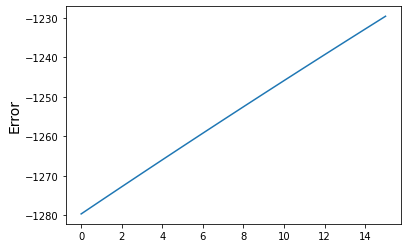

In [43]:
a=np.arange(0,16)
plt.plot(a,error)
plt.ylabel('Error', fontsize=14)

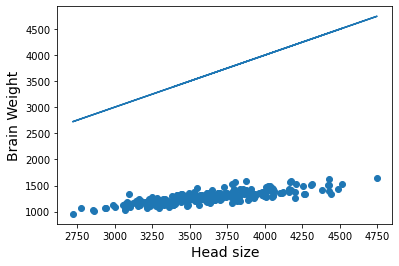

In [44]:
me =min(error)
#print(me)
min_index = error.index(me)
#print(min_index)
plt.scatter(x3,y)
plt.ylabel('Brain Weight', fontsize=14)
plt.xlabel('Head size', fontsize=14)
p=[]
for i in range(0,len(x1)):
  p.append(w01[min_index]*x1[i]+w02[min_index]*x2[i]+w03[min_index]*x3[i]+w00[min_index])
plt.plot(x3,p)

In [45]:
x1= 1
x2 =2
x3 = 4200
print(w01[min_index]*x1+w02[min_index]*x2+w03[min_index]*x3+w00[min_index])

4204
